In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
matplotlib 3.2.0
numpy 1.16.2
pandas 1.0.1
sklearn 0.22.2.post1
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
# 分割数据集的工具
from sklearn.model_selection import train_test_split

# 分割训练集和测试集，比例为3:1
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7) 
# 分割训练集和开发集，比例是3:1，总的比例是9:3:4
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
# 标准归一化工具
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
class WideDeepModel(keras.models.Model) :
    def __init__(self):
        super(WideDeepModel,self).__init__()
        self.hiden_layer1 = keras.layers.Dense(30,activation='relu')
        self.hiden_layer2 = keras.layers.Dense(30,activation='relu')
        self.output_layer = keras.layers.Dense(1)
        
    def call(self,input):
        hiden1 = self.hiden_layer1(input)
        hiden2 = self.hiden_layer2(hiden1)
        concat = keras.layers.concatenate([input,hiden2])
        output = self.output_layer(concat)
        return output

In [7]:
model = WideDeepModel()
model.build(input_shape=(None,8))
model.summary()

Model: "wide_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  270       
_________________________________________________________________
dense_1 (Dense)              multiple                  930       
_________________________________________________________________
dense_2 (Dense)              multiple                  39        
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2),
             keras.callbacks.TensorBoard(log_dir='logs/subclasses-callbacks')]

history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 79us/sample - loss: 1.9679 - val_loss: 0.8958
Epoch 2/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.7004 - val_loss: 0.7223
Epoch 3/100
11610/11610 [==============================] - 1s 50us/sample - loss: 0.6364 - val_loss: 0.6846
Epoch 4/100
11610/11610 [==============================] - 1s 95us/sample - loss: 0.6015 - val_loss: 0.6409
Epoch 5/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5763 - val_loss: 0.6127
Epoch 6/100
11610/11610 [==============================] - 1s 100us/sample - loss: 0.5545 - val_loss: 0.6092
Epoch 7/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5386 - val_loss: 0.5819
Epoch 8/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5211 - val_loss: 0.5644
Epoch 9/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.50

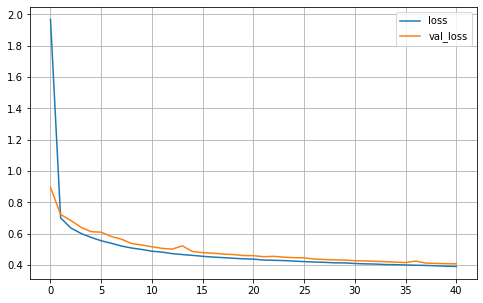

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 34us/sample - loss: 0.4077


0.40766231523927793